In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dnn_play.classifiers.sparse_autoencoder import SparseAutoencoder
from dnn_play.classifiers.softmax import Softmax
from dnn_play.classifiers.mlp import MLP

from dnn_play.utils.data_utils import load_mnist
from dnn_play.utils.visualize_utils import display_network

# Plot settings
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
# Load MNIST data

(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist()
#(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist(n_train=5500, n_val=500, n_test=1000)

print("X_train shape = {} y_train shape = {}".format(X_train.shape, y_train.shape))
print("X_val   shape = {} y_val  shape = {}".format(X_val.shape, y_val.shape))
print("X_test  shape = {} y_test shape = {}".format(X_test.shape, y_test.shape))

X_train shape = (55000, 784) y_train shape = (55000,)
X_val   shape = (5000, 784) y_val  shape = (5000,)
X_test  shape = (10000, 784) y_test shape = (10000,)


In [3]:
# Network configuration
input_size  = X_train.shape[1] # Dimension of features
hidden_size_L1 = 200
hidden_size_L2 = 200
output_size = np.max(y_train) + 1 # Number of classes

layer_units = (input_size, hidden_size_L1, hidden_size_L2, output_size)
n_layers = len(layer_units)

# Hyperparameters
reg = 2e-4 # 1e-4 # Regulation, weight decay    
beta = 3               # weight of sparsity penalty term       
sparsity_param = 1e-1  # desired average activation of the hidden units 

# Numerical parameters
max_iters = 400


In [4]:
# Train the first sparse autoencoder

sae1_layer_units = (input_size, hidden_size_L1, input_size)
sae1 = SparseAutoencoder(sae1_layer_units)
sae1_weights, sae1_loss_history = sae1.fit(X_train, reg=reg, beta=beta, sparsity_param=sparsity_param, 
                                           max_iters=max_iters, verbose=True)

# Train / Validation features of layer 1
train_features_L1 = sae1.forward_pass(X_train)
val_features_L1 = sae1.forward_pass(X_val)

iter:   20, loss: 24.512965
iter:   40, loss: 17.893108
iter:   60, loss: 12.790935
iter:   80, loss: 10.147536
iter:  100, loss: 8.579675
iter:  120, loss: 7.455113
iter:  140, loss: 6.706541
iter:  160, loss: 6.187018
iter:  180, loss: 5.784339
iter:  200, loss: 5.512282
iter:  220, loss: 5.315639
iter:  240, loss: 5.148164
iter:  260, loss: 5.012013
iter:  280, loss: 4.919683
iter:  300, loss: 4.830509
iter:  320, loss: 4.758168
iter:  340, loss: 4.688783
iter:  360, loss: 4.628258
iter:  380, loss: 4.567358
iter:  400, loss: 4.510771


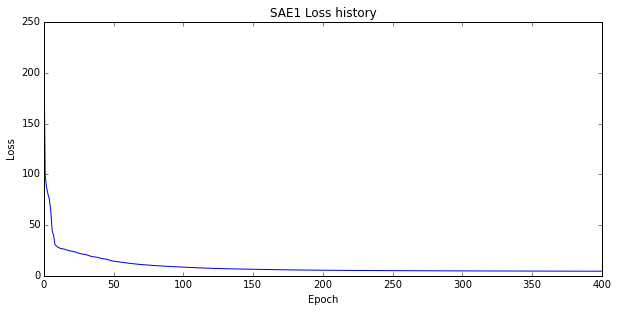

In [5]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(sae1_loss_history)
plt.title('SAE1 Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')


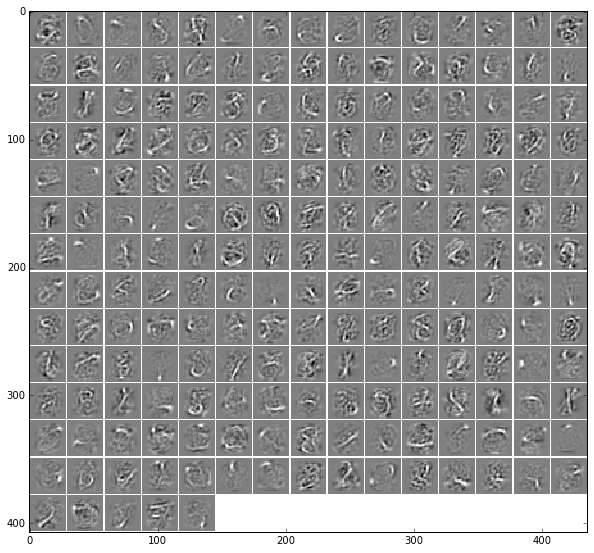

In [6]:
# Visualize the weights 

sae1_W0 = sae1_weights[0]['W']
image = display_network(sae1_W0)
plt.imshow(image, cmap = plt.cm.gray)

In [7]:
# Train the second sparse autoencoder

sae2_layer_units = (hidden_size_L1, hidden_size_L2, hidden_size_L1)
sae2 = SparseAutoencoder(sae2_layer_units)
sae2_weights, sae2_loss_history = sae2.fit(train_features_L1, reg=reg, beta=beta, sparsity_param=sparsity_param, 
                                           max_iters=max_iters, verbose=True)

# Train / Validation features of layer 2
train_features_L2 = sae2.forward_pass(train_features_L1)
val_features_L2 = sae2.forward_pass(val_features_L1)

iter:   20, loss: 3.870356
iter:   40, loss: 2.557963
iter:   60, loss: 2.024741
iter:   80, loss: 1.699575
iter:  100, loss: 1.518455
iter:  120, loss: 1.412255
iter:  140, loss: 1.350893
iter:  160, loss: 1.311039
iter:  180, loss: 1.277338
iter:  200, loss: 1.251721
iter:  220, loss: 1.229505
iter:  240, loss: 1.210008
iter:  260, loss: 1.193672
iter:  280, loss: 1.180739
iter:  300, loss: 1.168971
iter:  320, loss: 1.157312
iter:  340, loss: 1.147839
iter:  360, loss: 1.137430
iter:  380, loss: 1.130605
iter:  400, loss: 1.123317


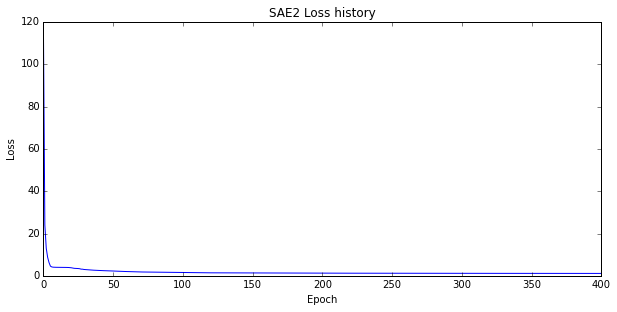

In [8]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(sae2_loss_history)
plt.title('SAE2 Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')


In [9]:
# Train softmax classifier
 
sm_layer_units = (hidden_size_L2, output_size)
sm_clf = Softmax(sm_layer_units)
sm_weights, sm_loss_history, sm_train_acc_history, sm_val_acc_history = sm_clf.fit(train_features_L2, y_train, 
    val_features_L2, y_val, reg=reg, max_iters=max_iters, verbose=True)


iter:   20, loss: 0.278223, train_acc: 0.946945, val_acc: 0.961600
iter:   40, loss: 0.271527, train_acc: 0.950945, val_acc: 0.965400
iter:   60, loss: 0.271289, train_acc: 0.951182, val_acc: 0.965200
iter:   80, loss: 0.271261, train_acc: 0.951018, val_acc: 0.965600


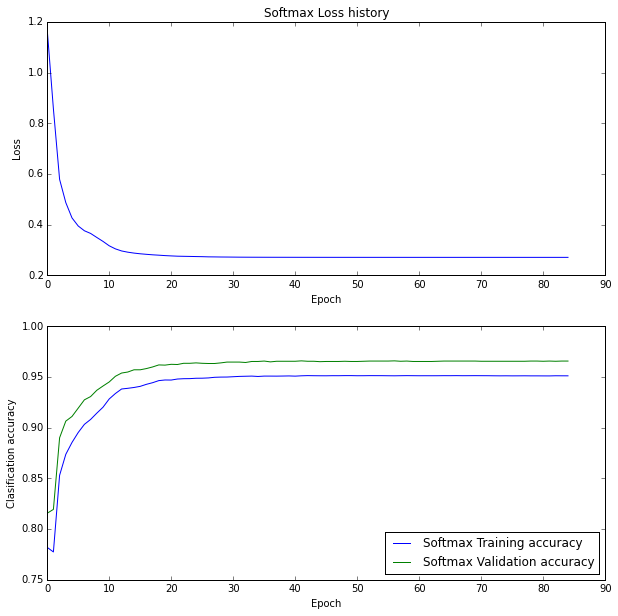

In [10]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(sm_loss_history)
plt.title('Softmax Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(sm_train_acc_history)
plt.plot(sm_val_acc_history)
plt.legend(['Softmax Training accuracy', 'Softmax Validation accuracy'], loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

In [11]:
# Initial weights
init_weights = [{} for i in range(n_layers - 1)] # Initial weights
init_weights[0] = sae1_weights[0]
init_weights[1] = sae2_weights[0]
init_weights[2] = sm_weights[0]

# Define the Multilayer perceptron classifier
clf = MLP(layer_units, weights=init_weights)

# Train
opt_weights, loss_history, train_acc_history, val_acc_history = clf.fit(X_train, y_train, X_val, y_val, 
                                                                        reg=reg, max_iters=max_iters, verbose=True)

iter:   20, loss: 0.454546, train_acc: 0.966145, val_acc: 0.974200
iter:   40, loss: 0.297224, train_acc: 0.978145, val_acc: 0.978200
iter:   60, loss: 0.219680, train_acc: 0.983618, val_acc: 0.979600
iter:   80, loss: 0.191619, train_acc: 0.987036, val_acc: 0.981600
iter:  100, loss: 0.176366, train_acc: 0.989764, val_acc: 0.982400
iter:  120, loss: 0.167822, train_acc: 0.991400, val_acc: 0.984600
iter:  140, loss: 0.162212, train_acc: 0.992382, val_acc: 0.984200
iter:  160, loss: 0.159403, train_acc: 0.992673, val_acc: 0.985400
iter:  180, loss: 0.157167, train_acc: 0.993055, val_acc: 0.985000
iter:  200, loss: 0.155405, train_acc: 0.993236, val_acc: 0.985200
iter:  220, loss: 0.153924, train_acc: 0.993418, val_acc: 0.984800
iter:  240, loss: 0.152531, train_acc: 0.993564, val_acc: 0.984400
iter:  260, loss: 0.151141, train_acc: 0.993818, val_acc: 0.985200
iter:  280, loss: 0.149839, train_acc: 0.994182, val_acc: 0.984600
iter:  300, loss: 0.148864, train_acc: 0.993964, val_acc: 0.98

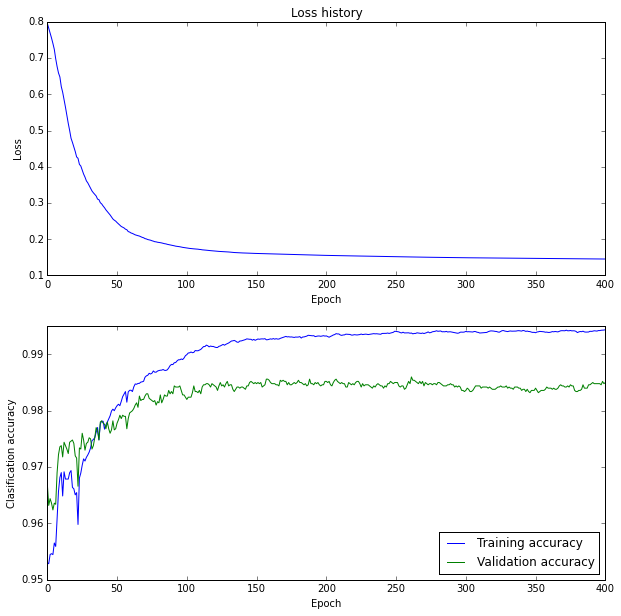

In [12]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_acc_history)
plt.plot(val_acc_history)
plt.legend(['Training accuracy', 'Validation accuracy'], loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')

In [13]:
# Make predictions with fine-tune

pred = clf.predict(X_test)
acc = np.mean(y_test == pred)

print("Accuracy with fine-tune: {:5.2f}% \n".format(acc*100))


Accuracy with fine-tune: 98.15% 



In [14]:
# Make predictions without fine-tune

clf_without_finetune = MLP(layer_units, weights=init_weights)
pred = clf_without_finetune.predict(X_test)
acc = np.mean(y_test == pred)

print("Accuracy without fine-tune: {:5.2f}% \n".format(acc*100))

Accuracy without fine-tune: 95.53% 



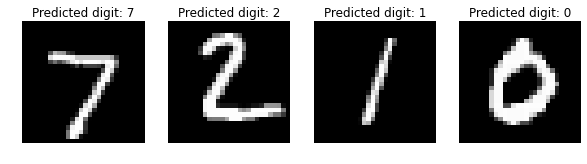

In [15]:
# View some images and predictions
n_images = 4
images = X_test[:n_images].reshape((n_images, 28, 28))
pred = clf.predict(X_test[:n_images])

for i in range(n_images):
    plt.subplot(1, n_images, i+1)
    plt.imshow(images[i], cmap = plt.cm.gray)
    plt.title('Predicted digit: {}'.format(pred[i]))
    plt.axis('off')
    

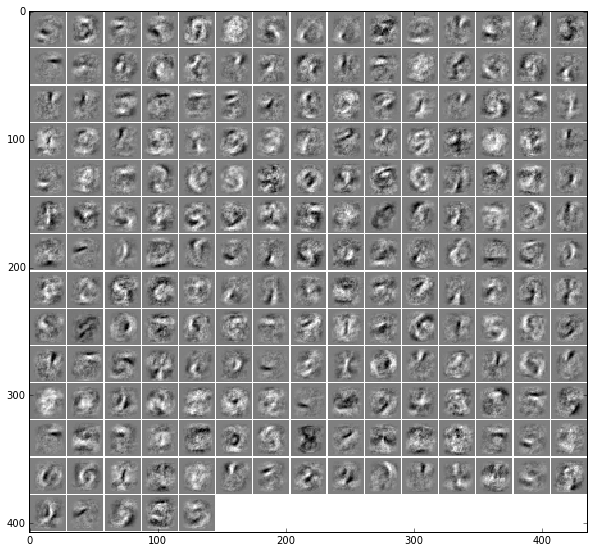

In [16]:
# Visulize the optimal W0

image = display_network(opt_weights[0]['W'])
plt.imshow(image, cmap = plt.cm.gray)